# Non linear SVM with polynomial kernel

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cvxopt as opt


In [3]:
def poly_kernel(x,y):
    # Function for calculating polynomial kernel
    return (1 + np.dot(x,y))**5

Used polynomial kernel

In [4]:
def assign_di(inp):
    # Function to assign desired output
    cond1 = inp[1] < 0.2 * np.sin(10*inp[0]) + 0.3
    cond2 = (inp[1] - 0.8)**2 + (inp[0] - 0.5)**2 < (0.15)**2
    if cond1 or cond2:
        return 1
    return -1

In [33]:
h = []
h_plus = []
h_minus = []
def assign_h(g, x, y):
    # function to assign values according to the hyperplane
    if -0.1 < g < 0.1:
        h.append([x_val[x], y_val[y]])
    elif 0.9 < g < 1.1:
        h_plus.append([x_val[x], y_val[y]])
    elif -1.1 < g < -0.9:
        h_minus.append([x_val[x], y_val[y]])

In [5]:
x = np.random.uniform(0,1,size=[100,2])
d = np.array([assign_di(i) for i in x])
c_pos = [x[i] for i in range(len(x)) if d[i] == 1]
c_neg = [x[i] for i in range(len(x)) if d[i] == -1]

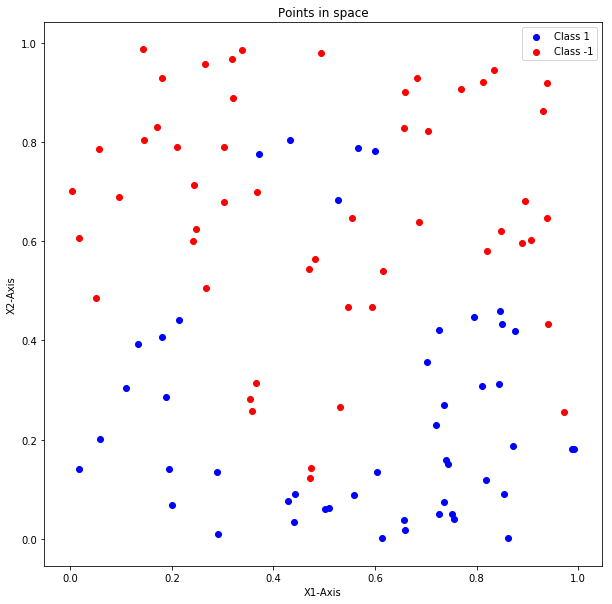

In [6]:
plt.figure(figsize=(10,10))
plt.xlabel('X1-Axis')
plt.ylabel('X2-Axis')
plt.title('Points in space')
c_pos_x = [vec[0] for vec in c_pos]
c_pos_y = [vec[1] for vec in c_pos]
c_neg_x = [vec[0] for vec in c_neg]
c_neg_y = [vec[1] for vec in c_neg]
plt.scatter(c_pos_x, c_pos_y, c='blue', marker='o', label='Class 1') 
plt.scatter(c_neg_x, c_neg_y, c='red', marker='o', label='Class -1') 
plt.legend()

In [7]:
kernel = np.zeros((100,100))
for i in range(100):
    for j in range(100):
        kernel[i,j] = poly_kernel(x[i],x[j])
inter = np.outer(d,d)
P = inter * kernel

In [8]:
P = opt.matrix(P)

In [9]:
q = opt.matrix(np.ones(100) * -1)
A = opt.matrix(d.astype(float), (1,100))
b = opt.matrix(0.0)
G = opt.matrix(-np.eye(100))
h = opt.matrix(np.zeros(100))

In [10]:
ans = opt.solvers.qp(P, q, G, h, A, b)

     pcost       dcost       gap    pres   dres
 0: -5.0446e+01 -1.3674e+02  4e+02  1e+01  3e+00
 1: -2.1840e+02 -3.4961e+02  2e+02  7e+00  1e+00
 2: -4.7255e+02 -6.6755e+02  2e+02  7e+00  1e+00
 3: -1.3111e+03 -1.6018e+03  3e+02  6e+00  1e+00
 4: -1.7759e+03 -2.1298e+03  4e+02  6e+00  1e+00
 5: -5.7847e+03 -6.5627e+03  8e+02  5e+00  1e+00
 6: -9.6206e+03 -1.0672e+04  1e+03  5e+00  1e+00
 7: -1.9013e+04 -2.0958e+04  2e+03  5e+00  1e+00
 8: -3.7685e+04 -4.2257e+04  5e+03  5e+00  1e+00
 9: -7.4546e+04 -8.7661e+04  1e+04  5e+00  9e-01
10: -1.5388e+05 -1.9646e+05  4e+04  3e+00  6e-01
11: -1.5621e+05 -2.0180e+05  5e+04  3e+00  6e-01
12: -1.8690e+05 -1.9966e+05  1e+04  2e-01  4e-02
13: -1.8843e+05 -1.8893e+05  5e+02  2e-03  4e-04
14: -1.8875e+05 -1.8876e+05  7e+00  3e-05  6e-06
15: -1.8876e+05 -1.8876e+05  8e-02  3e-07  6e-08
16: -1.8876e+05 -1.8876e+05  8e-04  3e-09  8e-10
Optimal solution found.


In [11]:
supp_vect = []
for i in range(len(ans['x'])):
    if ans['x'][i] > 0.0001:
        supp_vect.append(x[i])
        print(i)

5
30
44
49
61
77
78
81
82
86
95
96
97
98


In [12]:
supp_vect

[array([0.55464963, 0.64694468]),
 array([0.2137028, 0.4422239]),
 array([0.05049108, 0.48652733]),
 array([0.44333898, 0.08966026]),
 array([0.52771935, 0.68266318]),
 array([0.84557688, 0.45912681]),
 array([0.65711292, 0.82872703]),
 array([0.36837418, 0.7001544 ]),
 array([0.47233259, 0.12220827]),
 array([0.72528044, 0.42064001]),
 array([0.9729145 , 0.25588324]),
 array([0.49314426, 0.98014889]),
 array([0.68599076, 0.63870001]),
 array([0.99190511, 0.18046689])]

In [21]:
a = 0
for i in range(100):
    a += ans['x'][i] * d[i] * poly_kernel(x[i], x[5]) 

In [22]:
the = d[5] - a
the

79.7779580543642

In [36]:
x_val = np.linspace(0.0, 1.0, num=1000)
y_val = np.linspace(0.0, 1.0, num=1000)
for i in range(len(x_val)):
    for j in range(len(y_val)):
        desc_func = the
        for k in range(100):
            desc_func += ans['x'][k]*d[k]*poly_kernel(x[k], np.asarray([x_val[i], y_val[j]]))
        assign_h(desc_func, i, j)


<Figure size 720x720 with 0 Axes>

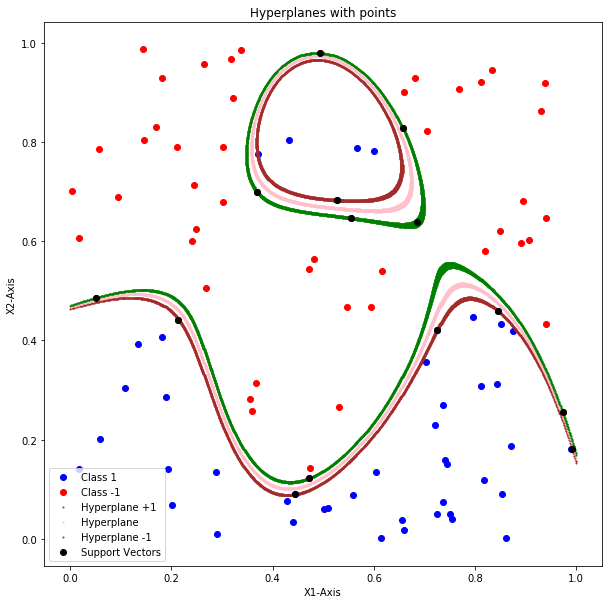

In [46]:
plt.figure(figsize=(10,10))
plt.figure(figsize=(10,10))
plt.xlabel('X1-Axis')
plt.ylabel('X2-Axis')
plt.title('Hyperplanes with points')
c_pos_x = [vec[0] for vec in c_pos]
c_pos_y = [vec[1] for vec in c_pos]
c_neg_x = [vec[0] for vec in c_neg]
c_neg_y = [vec[1] for vec in c_neg]
h_x = [vec[0] for vec in h]
h_y = [vec[1] for vec in h]
h_plus_x = [vec[0] for vec in h_plus]
h_plus_y = [vec[1] for vec in h_plus]
h_minus_x = [vec[0] for vec in h_minus]
h_minus_y = [vec[1] for vec in h_minus]
sv_x = [vec[0] for vec in supp_vect]
sv_y = [vec[1] for vec in supp_vect]
plt.scatter(c_pos_x, c_pos_y, c='blue', marker='o', label='Class 1') 
plt.scatter(c_neg_x, c_neg_y, c='red', marker='o', label='Class -1') 
plt.scatter(h_plus_x, h_plus_y, c = 'brown',s=1, label = 'Hyperplane +1')
plt.scatter(h_x, h_y, c = 'pink',s=1, label = 'Hyperplane')
plt.scatter(h_minus_x, h_minus_y, c = 'green', s=1, label = 'Hyperplane -1')
plt.scatter(sv_x, sv_y, facecolors = 'none', c='black', marker='o',label='Support Vectors')
plt.legend()
plt.show()
